<a href="https://colab.research.google.com/github/hamagami/preprocess/blob/main/03_03_%E7%94%BB%E5%83%8F%E3%81%A8%E7%B3%BB%E5%88%97%E3%83%87%E3%83%BC%E3%82%BF.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 画像と系列データの扱い

In [1]:
import pandas as pd
import urllib.request 
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt
import urllib.request 

## 画像データの読み込み

In [2]:
url = "https://dl.dropbox.com/s/9zmhzdrvse8h7n6/yokohama01.jpg" #画像データ
urllib.request.urlretrieve(url, 'yokohama.jpg') # titanicという名前で google colabのドライブに保存します
img= Image.open("yokohama.jpg")  # PIL(Python Image Library)で読みこみます

In [3]:
#画像データをnumpy形式で行列にして，サイズを確認します　(x, y, depth )になります
img_array = np.array(img)
print(img_array.shape)

(984, 2036, 3)


### 画像を出力してみます

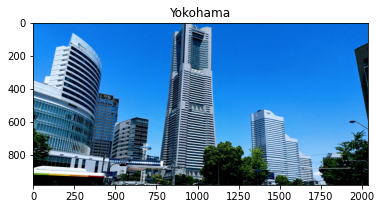

In [4]:
plt.imshow(img_array)
plt.title("Yokohama")
plt.show()

## 中身のデータをみてみます

In [5]:
print(img_array) # hight x width ×　depth のテンソルになっています

[[[ 14 129 236]
  [ 12 127 234]
  [ 11 126 233]
  ...
  [  5 107 215]
  [  2 104 212]
  [  5 107 215]]

 [[ 14 129 236]
  [ 12 127 234]
  [ 11 126 233]
  ...
  [  6 108 216]
  [  5 107 215]
  [  9 111 219]]

 [[ 13 128 235]
  [ 13 128 235]
  [ 12 127 234]
  ...
  [  5 107 217]
  [  5 107 217]
  [  9 111 221]]

 ...

 [[  0   0   0]
  [  0   0   0]
  [  0   0   0]
  ...
  [  0   0   0]
  [  0   0   0]
  [  0   0   0]]

 [[  0   0   0]
  [  0   0   0]
  [  0   0   0]
  ...
  [  0   0   0]
  [  0   0   0]
  [  0   0   0]]

 [[  0   0   0]
  [  0   0   0]
  [  0   0   0]
  ...
  [  0   0   0]
  [  0   0   0]
  [  0   0   0]]]


## １チャネルだけを取り出して行列にして表示させてみる

In [6]:
R = img_array[:, :, 0] # R  0の部分が1ならばG, 2ならばBのチャネルとなる
G = img_array[:, :, 1] # G
B = img_array[:, :, 2] # B

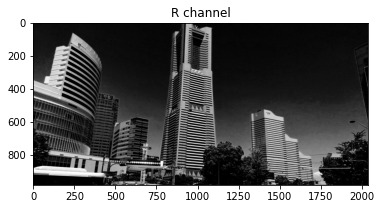

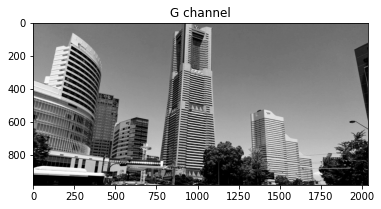

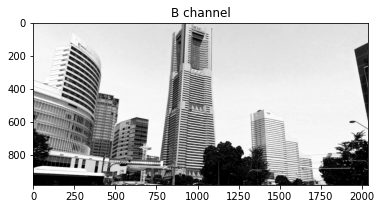

In [7]:
plt.imshow(R,cmap="gray") 
plt.title("R channel")
plt.show()
plt.imshow(G,cmap="gray")
plt.title("G channel")
plt.show()
plt.imshow(B,cmap="gray")
plt.title("B channel")
plt.show()

## 正しくグレースケールにする
```
# これはコードとして書式設定されます
```



In [8]:
img_gray = 0.299 * img_array[:, :, 0] + 0.587 * img_array[:, :, 1] + 0.114 * img_array[:, :, 2] #視覚的に正しいグレイスケール化

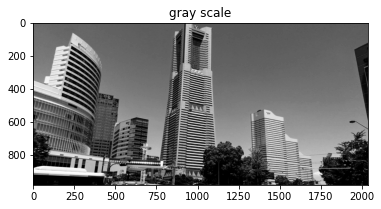

In [9]:
plt.imshow(img_gray,cmap="gray")
plt.title("gray scale")
plt.show()

In [10]:
print(img_gray.shape)# 中身は　hight x width の行列
print(img_gray)

(984, 2036)
[[106.813 104.813 103.813 ...  88.814  85.814  88.814]
 [106.813 104.813 103.813 ...  89.814  88.814  92.814]
 [105.813 105.813 104.813 ...  89.042  89.042  93.042]
 ...
 [  0.      0.      0.    ...   0.      0.      0.   ]
 [  0.      0.      0.    ...   0.      0.      0.   ]
 [  0.      0.      0.    ...   0.      0.      0.   ]]


##  2次元データを1次元に変えて(flatten) その結果をヒストグラムでみる　（輝度分布)

In [11]:
pixdata= img_gray.flatten()
pixdata

array([106.813, 104.813, 103.813, ...,   0.   ,   0.   ,   0.   ])

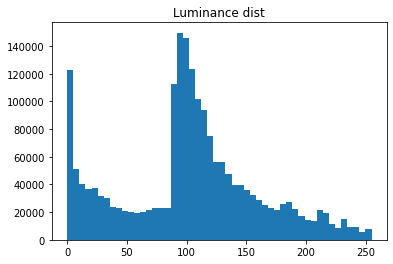

In [12]:
plt.hist(pixdata,bins=50)
plt.title("Luminance dist")
plt.show()

## 系列データの読み込み
コロナの新規陽性者数のデータを厚労省のページからもってきます

In [13]:
url = "https://covid19.mhlw.go.jp/public/opendata/newly_confirmed_cases_daily.csv" #新規陽性者数の推移（日別）
urllib.request.urlretrieve(url, 'daily.csv') # titanicという名前で google colabのドライブに保存します

('daily.csv', <http.client.HTTPMessage at 0x7faeba8a8790>)

In [14]:
df= pd.read_csv("daily.csv")  # PIL(Python Image Library)で読みこみます
df #データの様子をみてみます

,Date,Prefecture,Newly confirmed cases
0,2020/1/26,ALL,1
1,2020/1/26,Hokkaido,0
2,2020/1/26,Aomori,0
3,2020/1/26,Iwate,0
4,2020/1/26,Miyagi,0
...,...,...,...
27115,2021/8/12,Kumamoto,189
27116,2021/8/12,Oita,83
27117,2021/8/12,Miyazaki,61
27118,2021/8/12,Kagoshima,154


In [15]:
print(df.dtypes) # 単に読みこんだだけだと　date が Object型になっているはず　このままでも例としても問題ないが　あとで時間軸の操作も行いたいので日付型にしておく
df["Date"] = pd.to_datetime(df["Date"])
print(df.dtypes)

Date                     object
Prefecture               object
Newly confirmed cases     int64
dtype: object
Date                     datetime64[ns]
Prefecture                       object
Newly confirmed cases             int64
dtype: object


In [16]:
df

,Date,Prefecture,Newly confirmed cases
0,2020-01-26,ALL,1
1,2020-01-26,Hokkaido,0
2,2020-01-26,Aomori,0
3,2020-01-26,Iwate,0
4,2020-01-26,Miyagi,0
...,...,...,...
27115,2021-08-12,Kumamoto,189
27116,2021-08-12,Oita,83
27117,2021-08-12,Miyazaki,61
27118,2021-08-12,Kagoshima,154


In [17]:
tokyo_df = df[df["Prefecture"] == "Tokyo"] # Tokyo だけのデータ
osaka_df = df[df["Prefecture"] == "Osaka"] # Oaka だけのデータ
kanagawa_df= df[df["Prefecture"] == "Kanagawa"] # Kanagawa だけのデータ

In [18]:
tokyo_df

,Date,Prefecture,Newly confirmed cases
13,2020-01-26,Tokyo,0
61,2020-01-27,Tokyo,0
109,2020-01-28,Tokyo,0
157,2020-01-29,Tokyo,0
205,2020-01-30,Tokyo,0
...,...,...,...
26893,2021-08-08,Tokyo,4066
26941,2021-08-09,Tokyo,2884
26989,2021-08-10,Tokyo,2612
27037,2021-08-11,Tokyo,4200


## グラフにしてみる

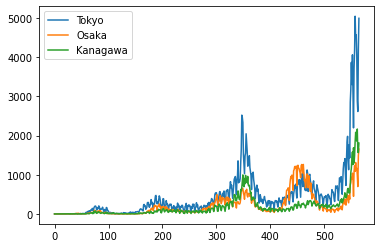

In [19]:
plt.plot(tokyo_df["Newly confirmed cases"].values, label="Tokyo")
plt.plot(osaka_df["Newly confirmed cases"].values, label="Osaka")
plt.plot(kanagawa_df["Newly confirmed cases"].values, label="Kanagawa")
plt.legend()
plt.show()

## フレーム分析
時系列データのうち，一定の時間幅（フレーム）でその時間内の特徴を捉える方法をフレーム分析といいます。一定の幅のデータを時間をずらしながら分析します
一番単純なフレーム分析は移動平均です。rollingを使うと便利です

In [20]:

tokyo_mean = pd.DataFrame({"Date":tokyo_df["Date"],"Average 1w cases":tokyo_df['Newly confirmed cases'].rolling(window=7).mean()})
tokyo_mean


,Date,Average 1w cases
13,2020-01-26,NaN
61,2020-01-27,NaN
109,2020-01-28,NaN
157,2020-01-29,NaN
205,2020-01-30,NaN
...,...,...
26893,2021-08-08,4037.000000
26941,2021-08-09,4135.428571
26989,2021-08-10,3978.714286
27037,2021-08-11,3983.571429


In [21]:
tokyo_mean["Date"]=tokyo_df["Date"]

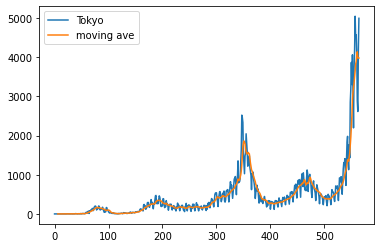

In [22]:
plt.plot(tokyo_df["Newly confirmed cases"].values, label="Tokyo")
plt.plot(tokyo_mean["Average 1w cases"].values, label="moving ave")
plt.legend()